<a href="https://colab.research.google.com/github/Gabriel-Brenner/DataPUCPR1/blob/main/Exerc%C3%ADcio_L08_Automated_machine_learning_(AutoML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar as bibliotecas necessárias
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Montar o Google Drive
drive.mount('/content/drive')

# Caminho da pasta no Google Drive
path = '/content/drive/My Drive/Dados08/'

# Carregar cada arquivo
insurance_data = pd.read_csv(f'{path}Insurance claims data.csv')
world_econ_classes = pd.read_csv(f'{path}World Economic Classifications v2.csv')
salaries = pd.read_csv(f'{path}salaries (2).csv')

# Mostrar os primeiros dados de cada DataFrame para verificação
print("Dados de Insurance claims:")
print(insurance_data.head())
print("\nDados de World Economic Classifications:")
print(world_econ_classes.head())
print("\nDados de Salaries:")
print(salaries.head())


Mounted at /content/drive
Dados de Insurance claims:
   policy_id  subscription_length  vehicle_age  customer_age region_code  \
0  POL045360                  9.3          1.2            41          C8   
1  POL016745                  8.2          1.8            35          C2   
2  POL007194                  9.5          0.2            44          C8   
3  POL018146                  5.2          0.4            44         C10   
4  POL049011                 10.1          1.0            56         C13   

   region_density segment model fuel_type     max_torque  ... is_brake_assist  \
0            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
1           27003      C1    M9    Diesel  200Nm@1750rpm  ...              No   
2            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
3           73430       A    M1       CNG   60Nm@3500rpm  ...              No   
4            5410      B2    M5    Diesel  200Nm@3000rpm  ...              No   

  i

Estatísticas Descritivas do Dataset:
       subscription_length   vehicle_age  customer_age  region_density  \
count         58592.000000  58592.000000  58592.000000    58592.000000   
mean              6.111688      1.388473     44.823935    18826.858667   
std               4.142790      1.134413      6.935604    17660.174792   
min               0.000000      0.000000     35.000000      290.000000   
25%               2.100000      0.400000     39.000000     6112.000000   
50%               5.700000      1.200000     44.000000     8794.000000   
75%              10.400000      2.200000     49.000000    27003.000000   
max              14.000000     20.000000     75.000000    73430.000000   

            airbags  displacement      cylinder  turning_radius        length  \
count  58592.000000  58592.000000  58592.000000    58592.000000  58592.000000   
mean       3.137066   1162.355851      3.626963        4.852893   3850.476891   
std        1.832641    266.304786      0.483616      

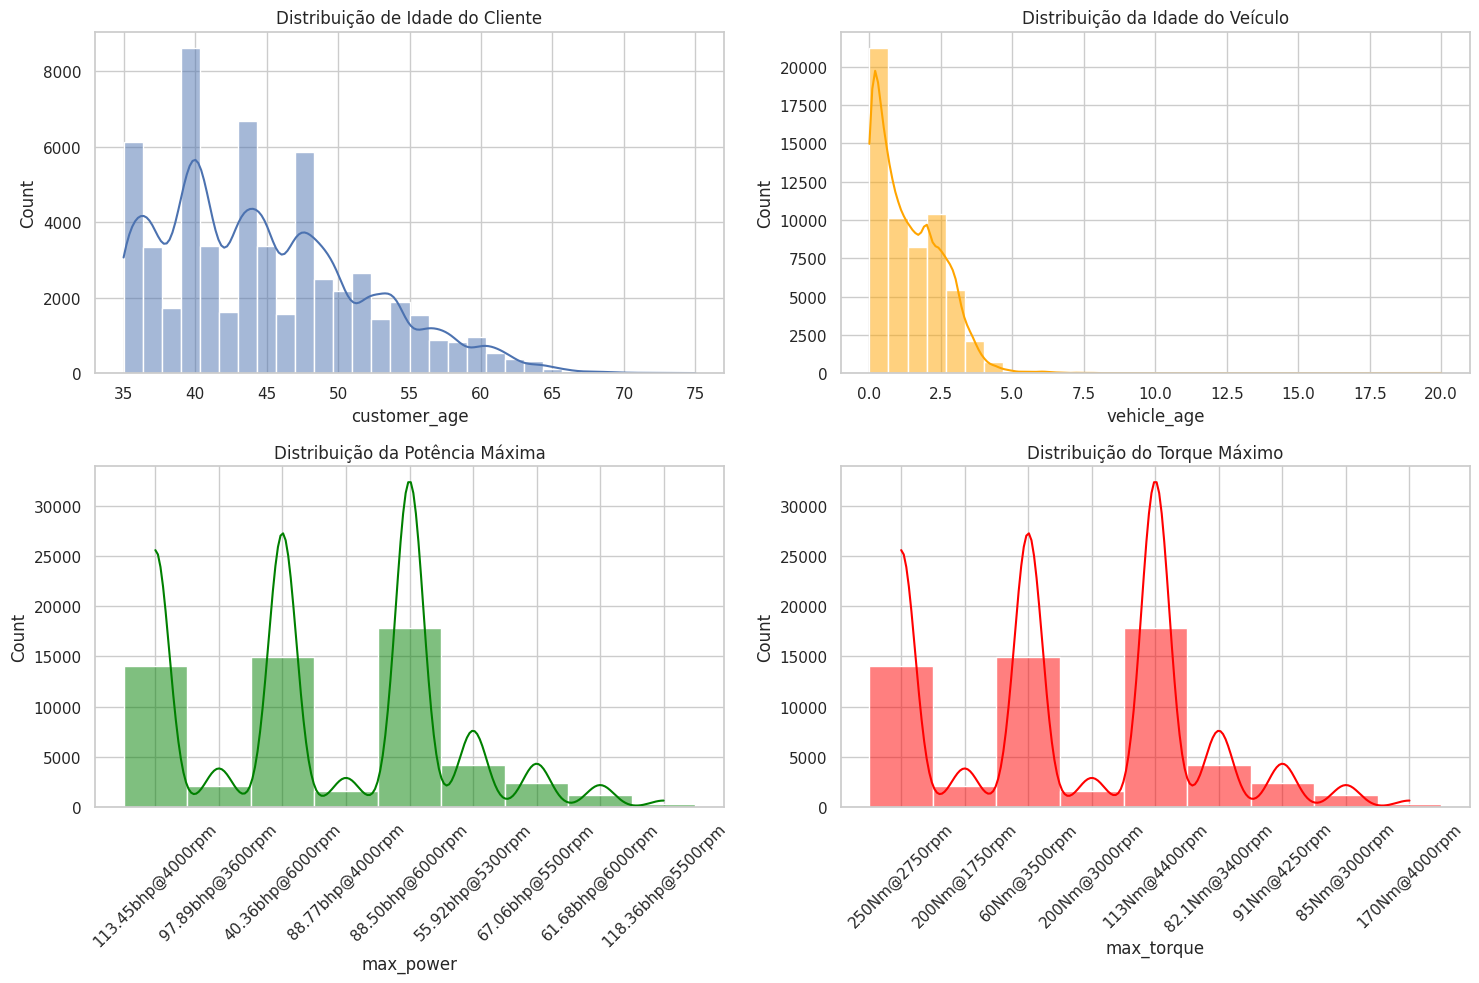

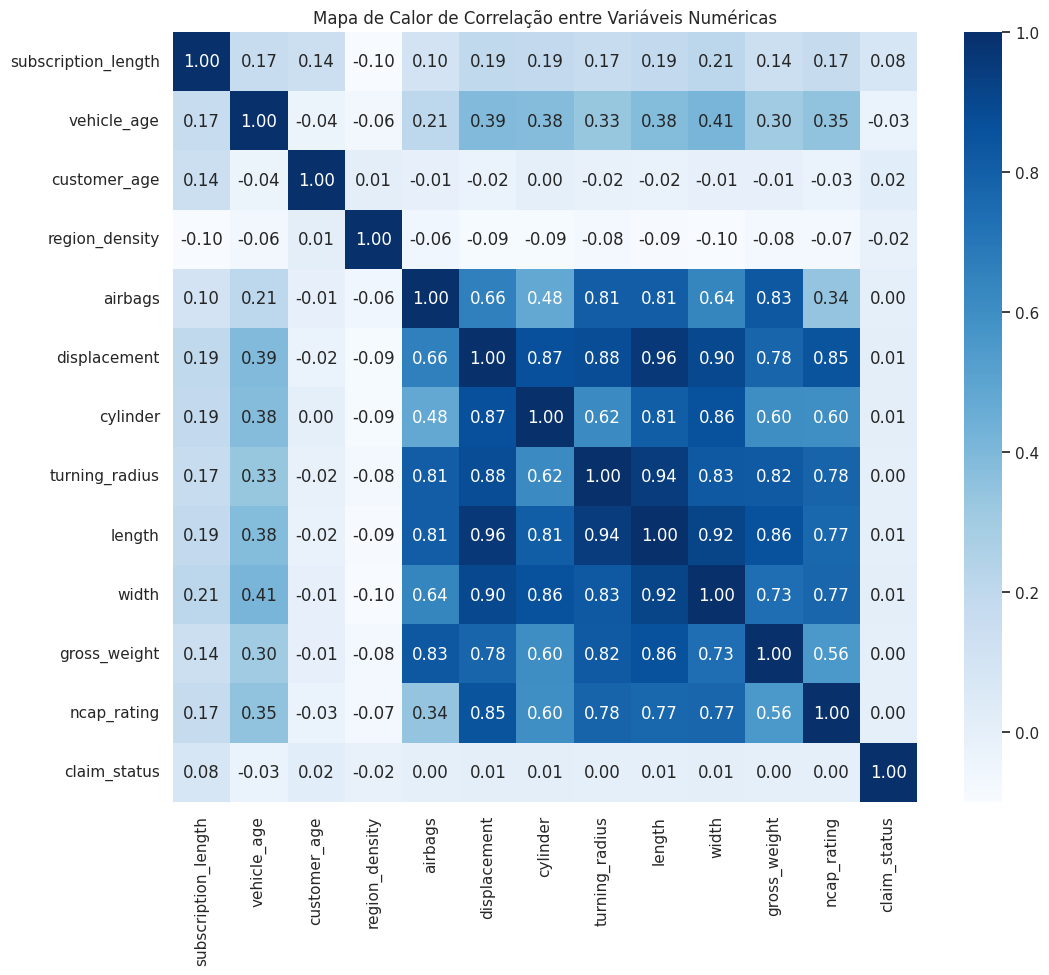

In [ ]:
# Importar bibliotecas necessárias para EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurações para os gráficos
sns.set(style="whitegrid")

# Estatísticas Descritivas
print("Estatísticas Descritivas do Dataset:")
print(insurance_data.describe())

# Verificar valores nulos
print("\nValores nulos no dataset:")
print(insurance_data.isnull().sum())

# Histogramas para algumas variáveis numéricas
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(insurance_data['customer_age'], bins=30, kde=True)
plt.title('Distribuição de Idade do Cliente')

plt.subplot(2, 2, 2)
sns.histplot(insurance_data['vehicle_age'], bins=30, kde=True, color='orange')
plt.title('Distribuição da Idade do Veículo')

plt.subplot(2, 2, 3)
sns.histplot(insurance_data['max_power'], bins=30, kde=True, color='green')
plt.title('Distribuição da Potência Máxima')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.histplot(insurance_data['max_torque'], bins=30, kde=True, color='red')
plt.title('Distribuição do Torque Máximo')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Correlação entre variáveis numéricas
correlation_data = insurance_data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_data.corr(), annot=True, fmt=".2f", cmap='Blues')
plt.title('Mapa de Calor de Correlação entre Variáveis Numéricas')
plt.show()


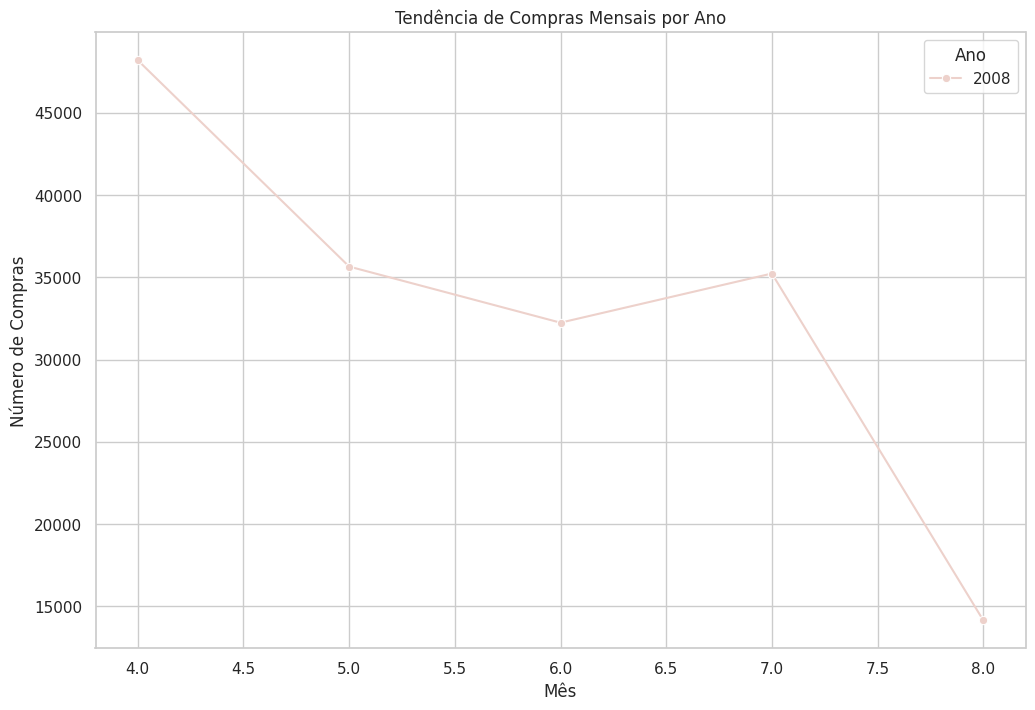

<ipython-input-8-c333bcc6f658>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='location', x='counts', data=location_counts, palette='viridis')


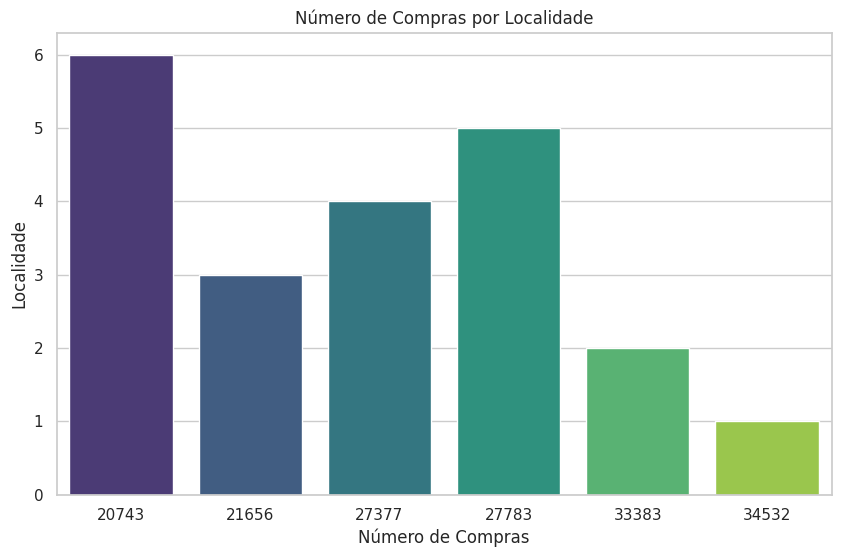

<ipython-input-8-c333bcc6f658>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='colour', x='counts', data=colour_counts, palette='viridis')


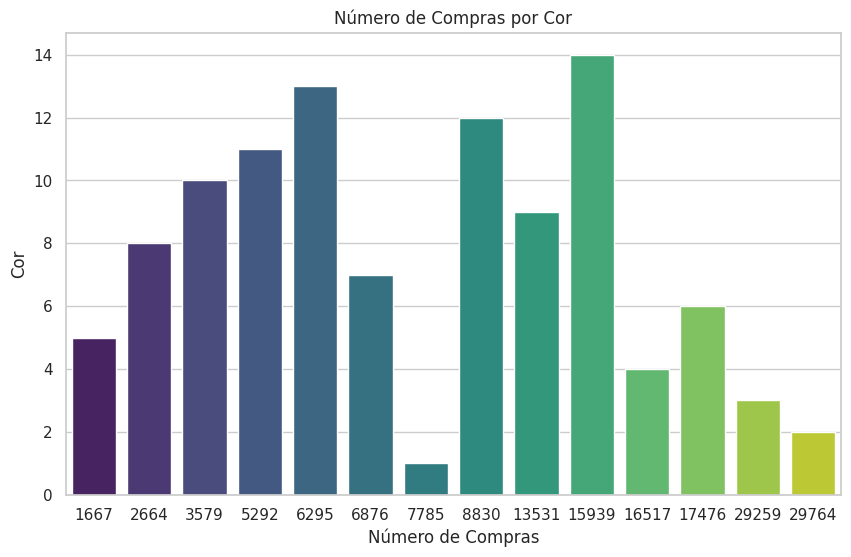

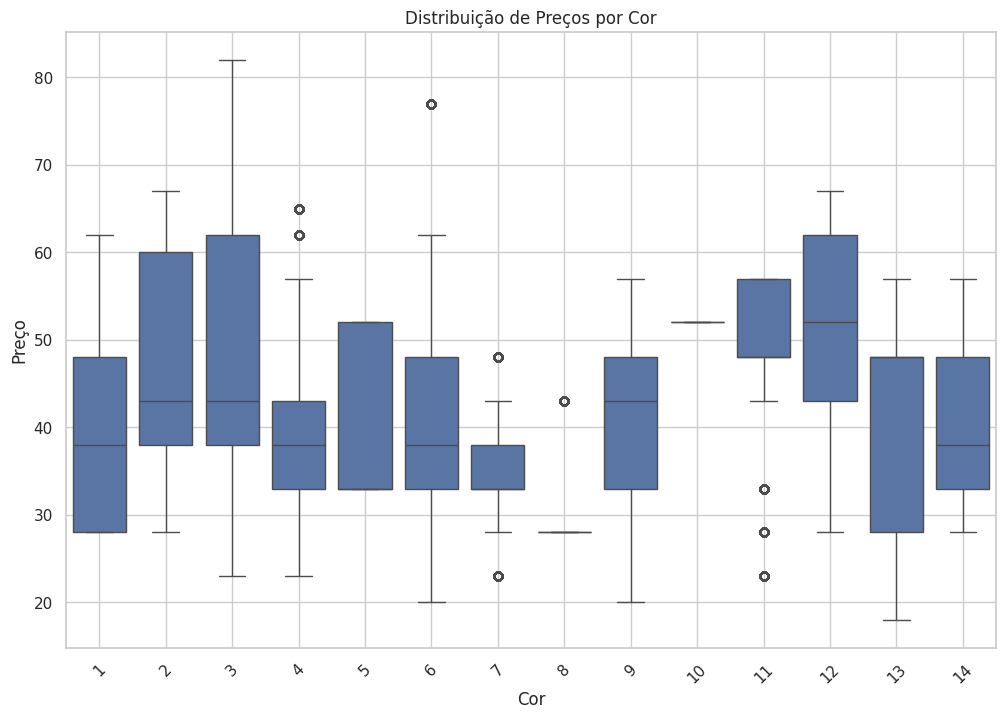

In [8]:
# Importar bibliotecas necessárias para EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dados do dataset "eshop.csv"
eshop_data = pd.read_csv('/content/drive/MyDrive/Dados08/eshop.csv')

# Configurações para os gráficos
sns.set(style="whitegrid")

# Análise de tendências ao longo dos meses com um lineplot para verificar sazonalidades
plt.figure(figsize=(12, 8))
monthly_trends = eshop_data.groupby(['year', 'month']).size().reset_index(name='counts')
sns.lineplot(x='month', y='counts', hue='year', data=monthly_trends, marker='o')
plt.title('Tendência de Compras Mensais por Ano')
plt.xlabel('Mês')
plt.ylabel('Número de Compras')
plt.legend(title='Ano')
plt.show()

# Análise do número de compras por localidade com barplot
plt.figure(figsize=(10, 6))
location_counts = eshop_data['location'].value_counts().reset_index()
location_counts.columns = ['location', 'counts']
sns.barplot(y='location', x='counts', data=location_counts, palette='viridis')
plt.title('Número de Compras por Localidade')
plt.xlabel('Número de Compras')
plt.ylabel('Localidade')
plt.show()

# Análise do número de compras por cor com barplot
plt.figure(figsize=(10, 6))
colour_counts = eshop_data['colour'].value_counts().reset_index()
colour_counts.columns = ['colour', 'counts']
sns.barplot(y='colour', x='counts', data=colour_counts, palette='viridis')
plt.title('Número de Compras por Cor')
plt.xlabel('Número de Compras')
plt.ylabel('Cor')
plt.show()

# Boxplot para analisar a distribuição de preços por cor, com melhorias na legibilidade
plt.figure(figsize=(12, 8))
sns.boxplot(x='colour', y='price', data=eshop_data)
plt.title('Distribuição de Preços por Cor')
plt.xlabel('Cor')
plt.ylabel('Preço')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


   work_year experience_level employment_type                  job_title  \
0       2024               SE              FT                AI Engineer   
1       2024               SE              FT                AI Engineer   
2       2024               SE              FT              Data Engineer   
3       2024               SE              FT              Data Engineer   
4       2024               SE              FT  Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  202730             USD         202730                 US             0   
1   92118             USD          92118                 US             0   
2  130500             USD         130500                 US             0   
3   96000             USD          96000                 US             0   
4  190000             USD         190000                 US             0   

  company_location company_size  
0               US            M  
1           

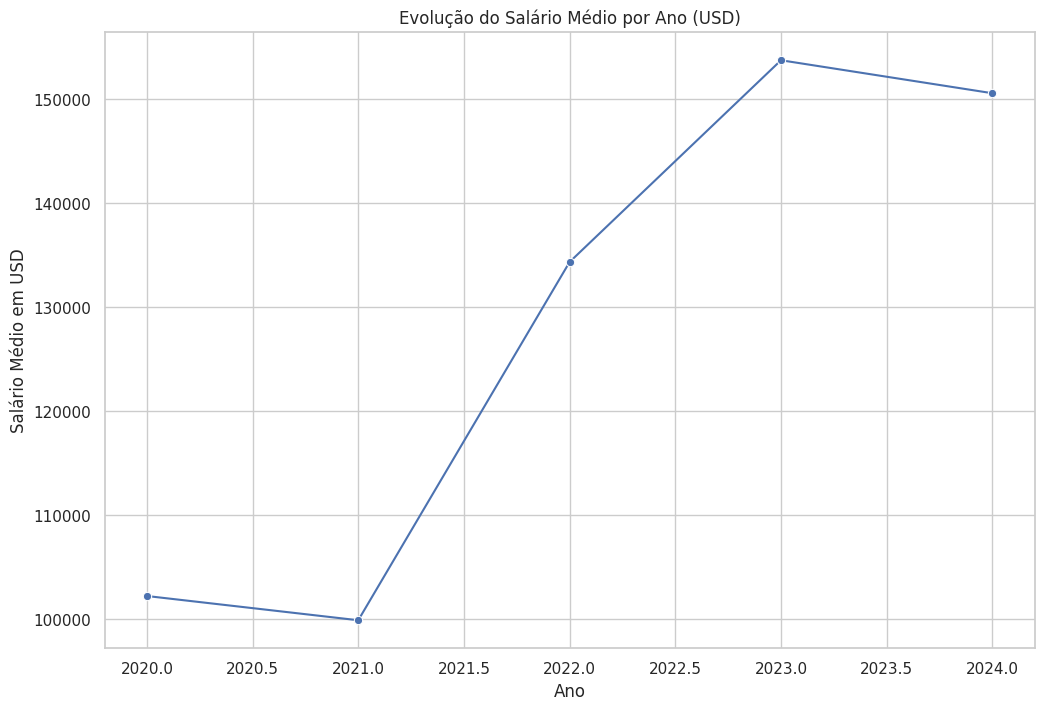

<ipython-input-12-fc5ceb05e27e>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='experience_level', y='salary_in_usd', data=salaries, palette="coolwarm")


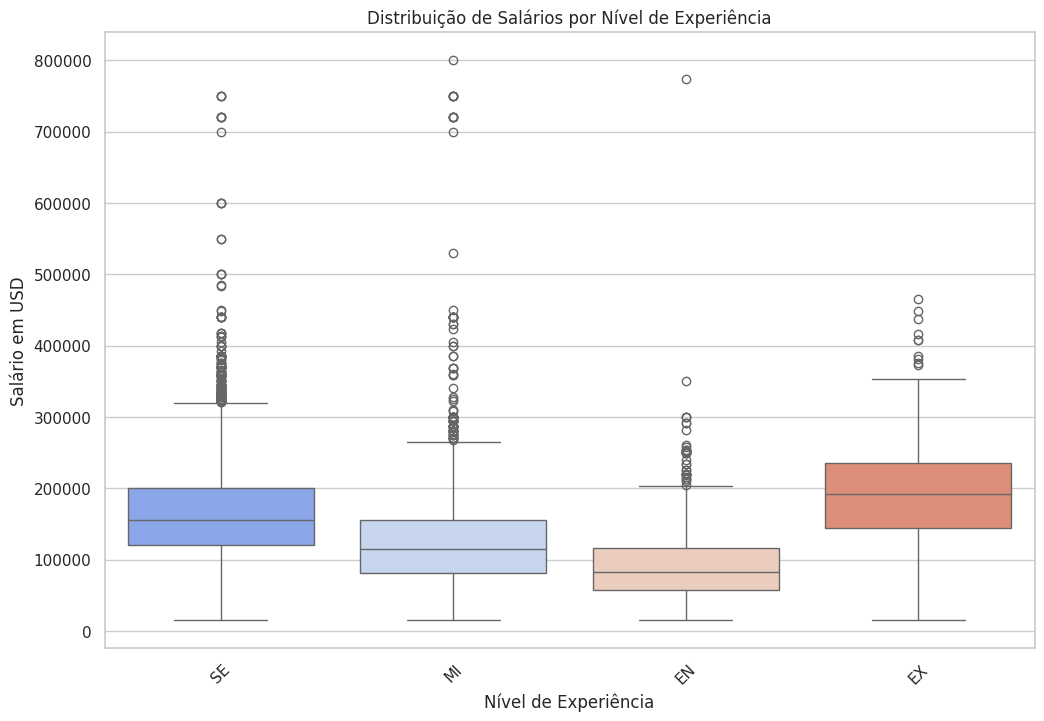

<ipython-input-12-fc5ceb05e27e>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='employment_type', y='salary_in_usd', data=salaries, palette="coolwarm")


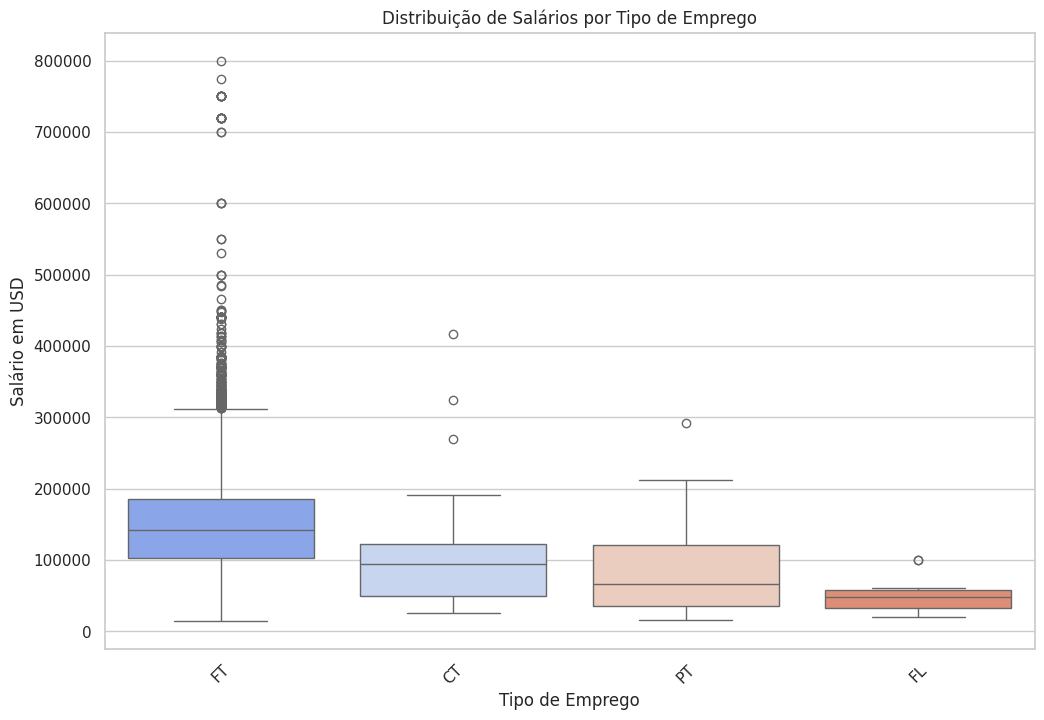

<ipython-input-12-fc5ceb05e27e>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='company_size', y='salary_in_usd', data=salaries, palette="coolwarm")


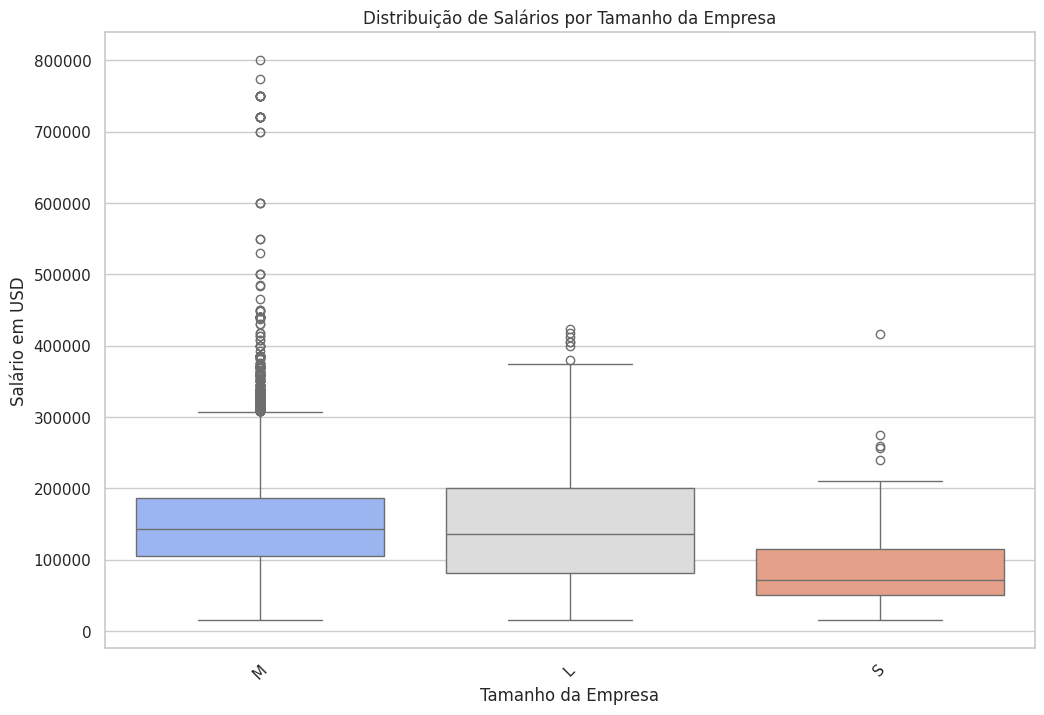

In [12]:
# Importar bibliotecas necessárias para EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Especificar o caminho onde o arquivo CSV está armazenado
path = '/content/drive/MyDrive/Dados08/'

# Carregar dados do dataset "salaries (2).csv"
salaries = pd.read_csv(f'{path}salaries (2).csv')

# Configurações para os gráficos
sns.set(style="whitegrid")

# Visualização inicial dos dados e checagem de nulos
print(salaries.head())
print(salaries.info())
print(salaries.isnull().sum())

# Evolução do salário médio por ano
plt.figure(figsize=(12, 8))
average_salary_by_year = salaries.groupby('work_year')['salary_in_usd'].mean()
sns.lineplot(x=average_salary_by_year.index, y=average_salary_by_year.values, marker='o')
plt.title('Evolução do Salário Médio por Ano (USD)')
plt.xlabel('Ano')
plt.ylabel('Salário Médio em USD')
plt.grid(True)
plt.show()

# Distribuição de salários por nível de experiência
plt.figure(figsize=(12, 8))
sns.boxplot(x='experience_level', y='salary_in_usd', data=salaries, palette="coolwarm")
plt.title('Distribuição de Salários por Nível de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário em USD')
plt.xticks(rotation=45)
plt.show()

# Análise de salários por tipo de emprego
plt.figure(figsize=(12, 8))
sns.boxplot(x='employment_type', y='salary_in_usd', data=salaries, palette="coolwarm")
plt.title('Distribuição de Salários por Tipo de Emprego')
plt.xlabel('Tipo de Emprego')
plt.ylabel('Salário em USD')
plt.xticks(rotation=45)
plt.show()

# Análise de salários por tamanho da empresa
plt.figure(figsize=(12, 8))
sns.boxplot(x='company_size', y='salary_in_usd', data=salaries, palette="coolwarm")
plt.title('Distribuição de Salários por Tamanho da Empresa')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Salário em USD')
plt.xticks(rotation=45)
plt.show()


**b) Describe the potential and limitations of five Python AutoML libraries for data science or machine/deep learning application.**


**Auto-Sklearn:**
Auto-Sklearn automatiza o processo de machine learning, incluindo seleção de características, escolha de algoritmos e ajuste de hiperparâmetros. Ele se integra facilmente com o scikit-learn, sendo acessível para usuários familiarizados com essa biblioteca. No entanto, possui suporte limitado para modelos de deep learning e pode ser lento e exigir muitos recursos para conjuntos de dados grandes ou com espaços de busca complexos.

**FALCON:**
FALCON foca na seleção automática e composição de algoritmos de machine learning com base nas características dos dados. Ele se adapta a mudanças nas distribuições dos dados e ajusta dinamicamente o processo de seleção de modelos. Por ser uma ferramenta mais recente, pode ter menos documentação e suporte da comunidade em comparação com bibliotecas mais estabelecidas.

**H2O AutoML:**
H2O AutoML oferece uma solução abrangente de AutoML com suporte tanto para algoritmos clássicos de machine learning quanto para modelos de deep learning. Ele escala bem para conjuntos de dados grandes e ambientes de computação distribuída. No entanto, possui uma curva de aprendizado íngreme devido à variedade de opções de configuração e algoritmos suportados, e oferece controle limitado sobre a arquitetura de modelos individuais.

**Ludwig:**
Ludwig simplifica o desenvolvimento de modelos de deep learning ao automatizar a pré-processamento de dados, treinamento de modelos e implantação. Ele suporta uma ampla gama de tarefas, incluindo classificação de texto, reconhecimento de imagens e previsão de séries temporais. No entanto, oferece menos flexibilidade em comparação com frameworks de deep learning mais personalizáveis como TensorFlow ou PyTorch, e pode ter suporte limitado para arquiteturas de modelos avançados.

**MLJAR:**
MLJAR oferece capacidades de AutoML de ponta a ponta, desde o pré-processamento de dados até a otimização e implantação de modelos. Ele fornece recursos de explicabilidade para entender as decisões e previsões do modelo. No entanto, pode exigir recursos computacionais substanciais para conjuntos de dados e espaços de busca complexos, e oferece menos flexibilidade na personalização das estratégias de otimização em comparação com outras plataformas de AutoML.